# Perdida de intensidad en la musica de los grupos de metal

La musica metal es facilmente reconocible por su sonido distorsionado, velocidad y gritos desgarrados o guturales, en general es un tipo de musica muy agresiva (la musica, no los musicos) pero personalmente creo que hay una tendencia, sobre todo en grupos con mucho recorrido, de bajar la intensidad de su musica con el tiempo, a veces incluso llegando a cambiar completamente de género. En este estudio analizaremos diferentes caracteristicas de las canciones de los grupos de metal a medida que van sacando nuevos albumes para averiguar si existe o no tal patron.

### Preparar el dataframe:
Los datos, previamente conseguidos de la api de spotify, estan separados en tres ficheros que tenemos que juntar en un solo dataframe:
+ albums.csv: nombre y fecha del album
+ songs.csv: nombre de la canción y del artista
+ song_features.csv: algunas características de las canciones como energia, volumen, tempo...

In [1]:
# importar librerias:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# cargar los datos:
albums_df = pd.read_csv('./data/albums.csv')
songs_df = pd.read_csv('./data/songs.csv')
song_features_df = pd.read_csv('./data/song_features.csv')

# visualizamos los dataframes para ver como juntarlos:
print(albums_df.head(2))
print()
print(songs_df.head(2))
print()
print(song_features_df.head(2))

                 album_id                                album_name  \
0  3Q9wXhEAX7NYCPP0hxIuDz          Meteora 20th Anniversary Edition   
1  28DUZ0itKISf2sr6hlseMy  Hybrid Theory (20th Anniversary Edition)   

  release_date release_date_precision  
0   2023-04-07                    day  
1   2020-10-09                    day  

                 album_id                 song_id   song_name       artist
0  3Q9wXhEAX7NYCPP0hxIuDz  1or6RDFkPMi3u4KM2LUBr3    Foreword  Linkin Park
1  3Q9wXhEAX7NYCPP0hxIuDz  16XJqMv1M2D1seDcPEznfY  Don't Stay  Linkin Park

                  song_id  acousticness  energy  loudness  valence  tempo(BPM)
0  16XJqMv1M2D1seDcPEznfY      0.000468   0.992    -3.410    0.673     179.828
1  1Fv4xhjAOSOV70kE3DW6n8      0.000309   0.929    -4.201    0.390     161.943


In [2]:
print(albums_df.info(), songs_df.info(), song_features_df.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9706 entries, 0 to 9705
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   album_id                9706 non-null   object
 1   album_name              9704 non-null   object
 2   release_date            9706 non-null   object
 3   release_date_precision  9706 non-null   object
dtypes: object(4)
memory usage: 303.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132897 entries, 0 to 132896
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   album_id   132897 non-null  object
 1   song_id    132897 non-null  object
 2   song_name  132878 non-null  object
 3   artist     132878 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132860 entries, 0 to 132859
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtyp

In [3]:
# primero le añadimos la info de los albumes a las canciones
songs_df = songs_df.merge(albums_df, on='album_id')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133085 entries, 0 to 133084
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   album_id                133085 non-null  object
 1   song_id                 133085 non-null  object
 2   song_name               133066 non-null  object
 3   artist                  133066 non-null  object
 4   album_name              133062 non-null  object
 5   release_date            133085 non-null  object
 6   release_date_precision  133085 non-null  object
dtypes: object(7)
memory usage: 7.1+ MB


In [4]:
# y ahora le añadimos las caracteristicas
songs_df = songs_df.merge(song_features_df, on='song_id')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133590 entries, 0 to 133589
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   album_id                133590 non-null  object 
 1   song_id                 133590 non-null  object 
 2   song_name               133571 non-null  object 
 3   artist                  133571 non-null  object 
 4   album_name              133567 non-null  object 
 5   release_date            133590 non-null  object 
 6   release_date_precision  133590 non-null  object 
 7   acousticness            133590 non-null  float64
 8   energy                  133590 non-null  float64
 9   loudness                133590 non-null  float64
 10  valence                 133590 non-null  float64
 11  tempo(BPM)              133590 non-null  float64
dtypes: float64(5), object(7)
memory usage: 12.2+ MB


In [5]:
# al juntar los datos se han vreado mas filas, puede ser que haya filas repetidas
songs_df.value_counts('song_id')

song_id
62voRgDljXD4LWLSdzlXjs    8
7ikapr0GO6r8FtyEqTpvG3    8
1gzBDiw0uuAbIluL5q5cUN    8
7tuIsPZy6Iy5BvXUxDp0AF    8
4AIPHwjrSQ0JERkD4PabBZ    8
                         ..
2Znop8Di1Ui0KFH6JIPBVV    1
2Znf6ecowaCzSZRDgKWftn    1
2ZnAe2Af6C6s8B25gtWbCU    1
2ZmhL7VDtIoxgpWucCOfBS    1
7zzUvEmZfdPxIERUvOBgwG    1
Name: count, Length: 132683, dtype: int64

In [6]:
# quitamos las filas repetidas y los ids que ya no son necesarios ya tenemos nuestro dataframe
songs_df.drop_duplicates(inplace=True)
songs_df.drop(['album_id', 'song_id'], axis=1, inplace=True)
songs_df

,song_name,artist,album_name,release_date,release_date_precision,acousticness,energy,loudness,valence,tempo(BPM)
0,Don't Stay,Linkin Park,Meteora 20th Anniversary Edition,2023-04-07,day,0.000468,0.992,-3.410,0.6730,179.828
1,Somewhere I Belong,Linkin Park,Meteora 20th Anniversary Edition,2023-04-07,day,0.000309,0.929,-4.201,0.3900,161.943
2,Lying from You,Linkin Park,Meteora 20th Anniversary Edition,2023-04-07,day,0.002450,0.940,-3.671,0.6780,160.081
3,Hit the Floor,Linkin Park,Meteora 20th Anniversary Edition,2023-04-07,day,0.073100,0.959,-4.042,0.8670,149.882
4,Easier to Run,Linkin Park,Meteora 20th Anniversary Edition,2023-04-07,day,0.048200,0.828,-4.790,0.2820,104.926
...,...,...,...,...,...,...,...,...,...,...
133585,Jericho,Arena,Songs From the Lions Cage,1995-01-11,day,0.145000,0.593,-8.310,0.1710,116.941
133586,Crying for Help III,Arena,Songs From the Lions Cage,1995-01-11,day,0.476000,0.179,-20.013,0.0395,118.114
133587,Midas Vision,Arena,Songs From the Lions Cage,1995-01-11,day,0.152000,0.746,-7.230,0.5540,120.001
133588,Crying for Help IV,Arena,Songs From the Lions Cage,1995-01-11,day,0.674000,0.310,-11.180,0.1790,110.013


In [7]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132766 entries, 0 to 133589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   song_name               132747 non-null  object 
 1   artist                  132747 non-null  object 
 2   album_name              132743 non-null  object 
 3   release_date            132766 non-null  object 
 4   release_date_precision  132766 non-null  object 
 5   acousticness            132766 non-null  float64
 6   energy                  132766 non-null  float64
 7   loudness                132766 non-null  float64
 8   valence                 132766 non-null  float64
 9   tempo(BPM)              132766 non-null  float64
dtypes: float64(5), object(5)
memory usage: 11.1+ MB


In [8]:
# algunas pocas canciones no tienen album, no nos sirven
songs_df.dropna(how='any', inplace=True)
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132742 entries, 0 to 133589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   song_name               132742 non-null  object 
 1   artist                  132742 non-null  object 
 2   album_name              132742 non-null  object 
 3   release_date            132742 non-null  object 
 4   release_date_precision  132742 non-null  object 
 5   acousticness            132742 non-null  float64
 6   energy                  132742 non-null  float64
 7   loudness                132742 non-null  float64
 8   valence                 132742 non-null  float64
 9   tempo(BPM)              132742 non-null  float64
dtypes: float64(5), object(5)
memory usage: 11.1+ MB


In [9]:
songs_df.describe()

,acousticness,energy,loudness,valence,tempo(BPM)
count,132742.000000,132742.000000,132742.000000,132742.000000,132742.000000
mean,0.092443,0.810827,-7.118970,0.350759,125.045023
std,0.215509,0.206725,3.963114,0.212067,29.854998
min,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,0.000124,0.735000,-8.502000,0.182000,102.024250
50%,0.001830,0.895000,-6.125000,0.325000,123.951500
75%,0.037900,0.957000,-4.569000,0.492000,144.106750
max,0.996000,1.000000,1.913000,1.000000,236.575000


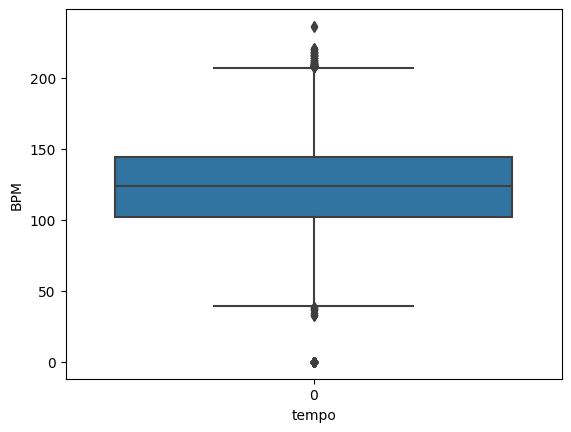

In [10]:
sns.boxplot(songs_df['tempo(BPM)'])
plt.xlabel('tempo')
plt.ylabel('BPM');

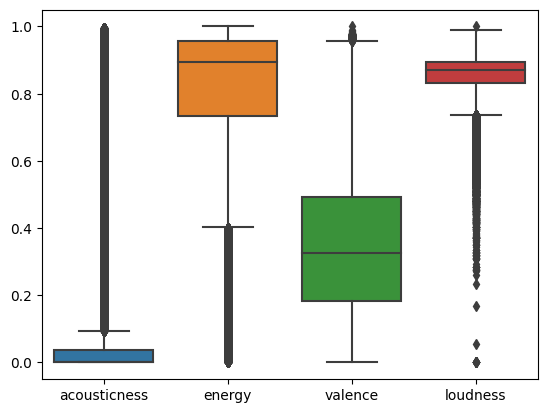

In [11]:
# normalizamos las columnas loudness
songs_df_norm = songs_df
songs_df_norm['loudness'] = MinMaxScaler().fit_transform(songs_df[['loudness']])
sns.boxplot(songs_df_norm[['acousticness', 'energy', 'valence', 'loudness']]);

A primera vista podemos obserbar que la gran mayoría cuple con las caracteristicas del genero:
- acousticness (0-1): No es musica acustica
- energy (0-1): Intensidad y actividad alta
- loudness (-60dB-0dB): Volumen alto
- tempo(BPM): Velocidad relativamente alta
- valence (0-1): Indice de positividad/felicidad bajo

Pero tambien tenemos muchos casos fuera de la tendencia, que en este caso nos interesa mantener ya que pueden ser utiles para la hipotesis.

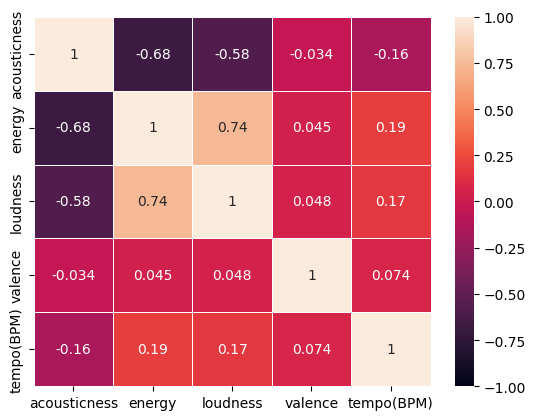

In [12]:
sns.heatmap(songs_df.corr(numeric_only=True),
            linewidths=0.5,
            vmin=-1, vmax=1,
            annot=True
            );

La variable que nos interesa es "energy" ya que es la intensidad, potencia, actividad que tiene la canción, y como se puede ver, tiene una correlacion negativa con lo acusticas que son ya que obviamente la musica acustica no puede tener tanta actividad, y una correlación positiva moderada con el volumen, cuanto mas alta esta tiene mayor intensidad. Por otra parte la positividad y el velocidad no influyen en las otras variables

Con esto hemos visto las caracteristicas generales del metal, pero no podemos sacar conclusiones todavia, para ello antes necesitamos poder ordenar los albumes por fecha para hacer el seguimiento de las caracteristicas en el tiempo, y para poder compararlos mejor les daremos un orden (primero album, segundo album...)

In [13]:
# modificar fechar para que acepte el formato, añadir mes y/o dia a los que les falte
song_df_only_year = songs_df[songs_df['release_date_precision'] == 'year']
songs_df.loc[songs_df['release_date_precision'] == 'year', 'release_date'] = song_df_only_year['release_date'].astype('str') + '-01'
songs_df.loc[songs_df['release_date_precision'] == 'year', 'release_date_precision'] = 'month'

song_df_only_year = songs_df[songs_df['release_date_precision'] == 'month']
songs_df.loc[songs_df['release_date_precision'] == 'month', 'release_date'] = song_df_only_year['release_date'].astype('str') + '-01'
songs_df.loc[songs_df['release_date_precision'] == 'month', 'release_date_precision'] = 'day'

# cambiar a formato fecha para poder ordenarlos
songs_df['release_date'] = pd.to_datetime(songs_df['release_date'])

In [21]:
albums_df = songs_df.groupby(['artist', 'album_name', 'release_date'])\
                            [['acousticness', 'energy', 'loudness','valence', 'tempo(BPM)']]\
                            .mean().reset_index().sort_values(['artist', 'release_date'])

# añadir una columna con el numero del album segun su fecha de publicación
artist_name = ''
column_orders = []
albums_order = []
for row in albums_df.itertuples():
    if row.artist != artist_name:
        column_orders.extend(albums_order)
        artist_name = row.artist
        album_nunber = 1
        albums_order = []
        albums_order.append(album_nunber)
    else:
        album_nunber += 1
        albums_order.append(album_nunber)
column_orders.extend(albums_order)

albums_df['album_number'] = column_orders
albums_df.head()

,artist,album_name,release_date,acousticness,energy,loudness,valence,tempo(BPM),album_number
0,(Hed) P.E.,(Hed)Pe,1997-08-14,0.022647,0.760885,0.827756,0.373538,111.827846,1
5,(Hed) P.E.,Broke,2000-09-01,0.007640,0.786500,0.872711,0.598333,99.732250,2
4,(Hed) P.E.,Blackout,2003-03-16,0.002565,0.808071,0.873636,0.482857,118.113286,3
12,(Hed) P.E.,Only In Amerika,2005-02-22,0.014111,0.883714,0.879268,0.534000,123.607500,4
2,(Hed) P.E.,Back 2 Base X,2006-06-06,0.092770,0.820923,0.842953,0.714923,125.628000,5


In [39]:
albums_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9947 entries, 0 to 9940
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   artist        9947 non-null   object        
 1   album_name    9947 non-null   object        
 2   release_date  9947 non-null   datetime64[ns]
 3   acousticness  9947 non-null   float64       
 4   energy        9947 non-null   float64       
 5   loudness      9947 non-null   float64       
 6   valence       9947 non-null   float64       
 7   tempo(BPM)    9947 non-null   float64       
 8   album_number  9947 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 777.1+ KB


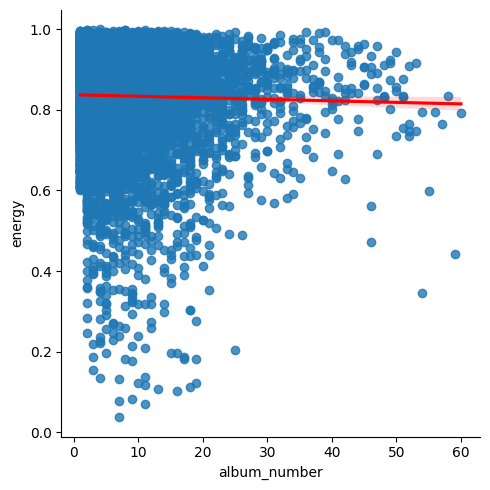

In [66]:
# seleccionamos solo los grupos cuyo primer disco es bastante energico
intense_start_artists = albums_df[(albums_df['album_number'] == 1) & (albums_df['energy'] > 0.6)]['artist']
sns.lmplot(albums_df[(albums_df['artist'].isin(intense_start_artists))],
           x='album_number', y='energy',
           line_kws={'color': 'red'});

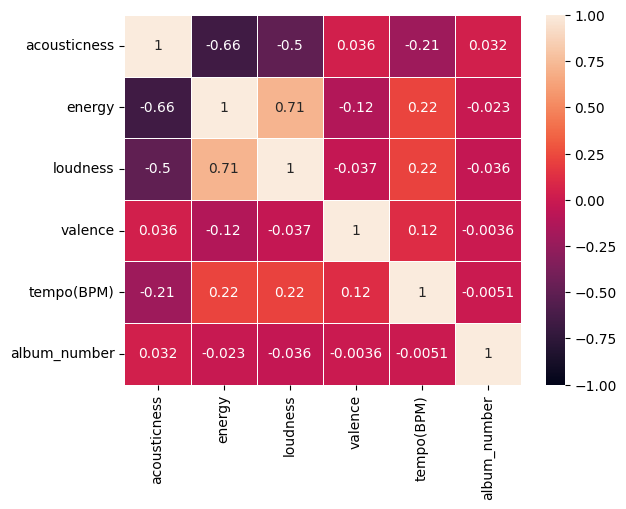

In [69]:
albums_energy_df = albums_df[(albums_df['artist'].isin(intense_start_artists))]
sns.heatmap(albums_energy_df.corr(numeric_only=True),
            linewidths=0.5,
            vmin=-1, vmax=1,
            annot=True
            );

## Conclusión

Segun los datos analizados los grupos no pierden apenas intesidad al cabo de los años ya que no hay ninguna relacion entre las dos variables asi que la hipotesis no se cumple.